# Homework 1 - Time Series Analysis EDS 296
## Student: Bailey Jørgensen

1. Locate monthly data for a historical simulation run with any two CMIP6 models of your choice. Data may be accessed either by download from the Earth System Grid Federation MetaGrid, or through the Amazon Web Services cloud server.

In [1]:
# Import packages
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs

In [2]:
# Open the CMIP6 data catalog, store as a variable...like we did in class!
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

2. Download (or write Python code to access via the cloud) data from the historical simulation,as well as corresponding future projection information for two different future emissions scenarios, for each model. NOTE: particularly if you’re working with the ESGF, there are many different scenarios listed - let’s stick to the main SSPs (they will be called ‘ssp126’,‘ssp245’, ‘ssp370’, or ‘ssp585’).

In [3]:
# Ok, lets find what models will help us capture all of our variables, given that I want to do historic and future preditions, plus 2 scenarios
res_test = catalog.search(activity_id=['ScenarioMIP', 'CMIP'], experiment_id=['historical', 'ssp126', 'ssp585']).df

# Take a look at what models are captured under these terms
print(res_test.source_id.unique())

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CNRM-ESM2-1' 'MIROC6' 'AWI-CM-1-1-MR'
 'MRI-ESM2-0' 'CESM2-WACCM' 'CanESM5' 'CESM2' 'SAM0-UNICON' 'GISS-E2-1-H'
 'UKESM1-0-LL' 'EC-Earth3' 'EC-Earth3-Veg' 'CanESM5-CanOE' 'INM-CM4-8'
 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0'
 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM'
 'GISS-E2-1-G-CC' 'FGOALS-g3' 'FGOALS-f3-L' 'MIROC-ES2L' 'KACE-1-0-G'
 'NorCPM1' 'CNRM-CM6-1-HR' 'KIOST-ESM' 'NorESM2-MM' 'ACCESS-CM2'
 'FIO-ESM-2-0' 'ACCESS-ESM1-5' 'CESM2-FV2' 'CESM2-WACCM-FV2' 'GISS-E2-2-H'
 'E3SM-1-1' 'HadGEM3-GC31-MM' 'IITM-ESM' 'CIESM' 'E3SM-1-1-ECA'
 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR' 'TaiESM1' 'CAS-ESM2-0' 'CMCC-CM2-SR5'
 'EC-Earth3-AerChem' 'IPSL-CM5A2-INCA' 'CMCC-CM2-HR4' 'EC-Earth3P-VHR'
 'EC-Earth3-CC' 'CMCC-ESM2' 'MIROC-ES2H' 'ICON-ESM-LR' 'IPSL-CM6A-LR-INCA']


In [4]:
# Let's pick two models! Both of these are also listed on the CMIP6 webpage, under the ocean ensemble
res_test = catalog.search(activity_id=['ScenarioMIP', 'CMIP'], experiment_id=['historical', 'ssp126', 'ssp585'], source_id='CanESM5').df
res_test1 = catalog.search(activity_id=['ScenarioMIP', 'CMIP'], experiment_id=['historical', 'ssp126', 'ssp585'], source_id='CESM2').df

In [5]:
# Ok, we know the models will match now - now lets make sure the ensemble #s match too (aka member IDs)
# Extract the member_id columns from both dataframes
members_res = set(res_test['member_id'])
members_res1 = set(res_test1['member_id'])

# Find the intersection
common_members = members_res.intersection(members_res1)

# Check if there are matching member_ids
if common_members:
    print("Matching member_id(s) found:", common_members)
else:
    print("No matching member_id(s) found.")

Matching member_id(s) found: {'r2i1p1f1', 'r11i1p1f1', 'r1i1p1f1', 'r5i1p1f1', 'r10i1p1f1', 'r7i1p1f1', 'r6i1p1f1', 'r8i1p1f1', 'r3i1p1f1', 'r9i1p1f1', 'r4i1p1f1'}


In [6]:
# Ok, now that we know all of our variables, we can build our full search!
res = catalog.search(activity_id=['ScenarioMIP', 'CMIP'], experiment_id=['historical', 'ssp126', 'ssp585'], source_id=['CanESM5', 'CESM2'], member_id='r8i1p1f1', table_id='Omon', variable_id='tos').df

# Now lets take a peek
display(res)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r8i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190311
1,CMIP,NCAR,CESM2,historical,r8i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190311
2,CMIP,CCCma,CanESM5,historical,r8i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp585,r8i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp126,r8i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [7]:
# Now lets turn each of the scenarios we want to plot into xarrays
historical_cesm2 = xr.open_zarr(res['zstore'][1], storage_options={'anon': True})
historical_canesm5 = xr.open_zarr(res['zstore'][2], storage_options={'anon': True})
ssp_585 = xr.open_zarr(res['zstore'][3], storage_options={'anon': True})
ssp_126 = xr.open_zarr(res['zstore'][4], storage_options={'anon': True})

# Convert time to datetime64 format for each variable, for plotting
time = historical_cesm2.time.astype('datetime64[ns]')
time1 = historical_canesm5.time.astype('datetime64[ns]')
time2 = ssp_585.time.astype('datetime64[ns]')
time3 = ssp_126.time.astype('datetime64[ns]')

3. Choose a region that you’re interested in to analyze, anywhere in the world. The only constraint is that your region needs to be large enough to include at least one model grid point.

a. Describe, in markdown text, the climate of that region in general terms. What is it like? Is it a forest, a desert, polar, tropical, urban, etc? What types of climate change impacts might you expect there?

***The Philippine Islands are urban, tropical islands, located in an area of unique biodeiveristy and located along several major shipping routes. I would expect over time that rising sea temperatures would have effects on the coral and other unique undersea life forms here. I would also imagine that these rising sea temperatures would increase the intensity of the tropical storms that impact the lives of the humans living there, as well as trade and commerce of the shipping lanes.***

b. Read in the surface air temperature datasets from 1 and 2, and create annually averaged, area-weighted, regionally averaged time series for your region of interest. (Examples of how to do this can be found in the various Time Series Plots tutorials we used in class.) Since you’re working with two models and two scenarios, this should result in four time series — however, if you used the same historical ensemble member for multiple scenarios, they will end up lying on top of each other and that’s ok!

4. Plot your regional time series, and fit a trend line for two different time periods:

- historical (1850-2015)
- historical plus future (1850-2100)

Over both of those time periods, is the temperature of your region changing, and is that change statistically significant?

# Plot 1

In [8]:
# Lets look at one of the xarrays:
historical_cesm2

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, vertices: 4, time: 1980, d2: 2)
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lat_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
    lon        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * time       (time) object 1850-01-15 13:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, d2) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: vertices, d2
Data variables:
    tos        (time, nlat, nlon) float32 dask.array<chunksize=(400, 384, 320), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  284700.0
    case_id:                22
    ...                     ...
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r8i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/dd157381-e97c-4a64-bbce-7fc5645e3941...
    version_id:             v20190311

In [11]:
# Define min/max bounds for the Southern Philippines
lat_min, lat_max = 5.0, 10.0    
lon_min, lon_max = 117.0, 126.0 

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
res_lat = (historical_cesm2.lat >= lat_min) & (historical_cesm2.lat <= lat_max)
res_lon = (historical_cesm2.lon >= lon_min) & (historical_cesm2.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tos_res = historical_cesm2.where(res_lat & res_lon, drop=True)

# Average over lat, lon dimensions to get a time series ... from looking at the output of tos_CI it looks like these are j and i
tos_res = tos_res.mean(dim=["nlat", "nlon"])

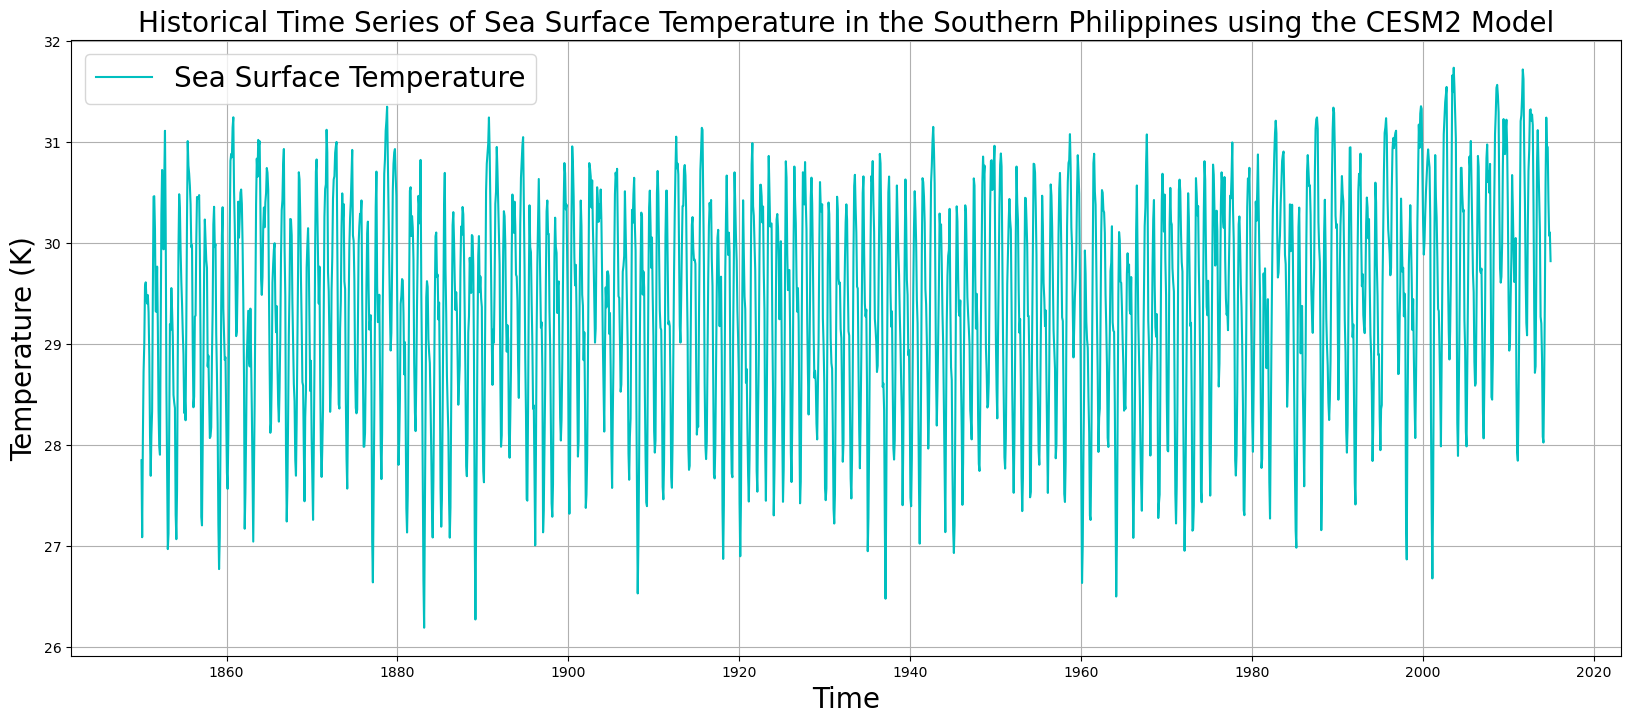

In [12]:
# Lets plot res!
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tos_res.tos, label='Sea Surface Temperature', color='c')
ax.set_title("Historical Time Series of Sea Surface Temperature in the Southern Philippines using the CESM2 Model", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

# Plot 2

In [13]:
# Take a look at this xarray and its variables
historical_canesm5

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1980, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (time, j, i) float32 dask.array<chunksize=(215, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            6d3a419a21ae12eeb74ae34a13fc3a02f0fe3f60
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his08
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variable_id:                 tos
    variant_label:               r8i1p1f1
    version:                     v20190429
    status:                      2019-11-11;created;by nhn2@columbia.edu
    netcdf_tracking_ids:         hdl:21.14100/b676e37c-0030-4f5b-b6f7-ee7ad37...
    version_id:                  v20190429

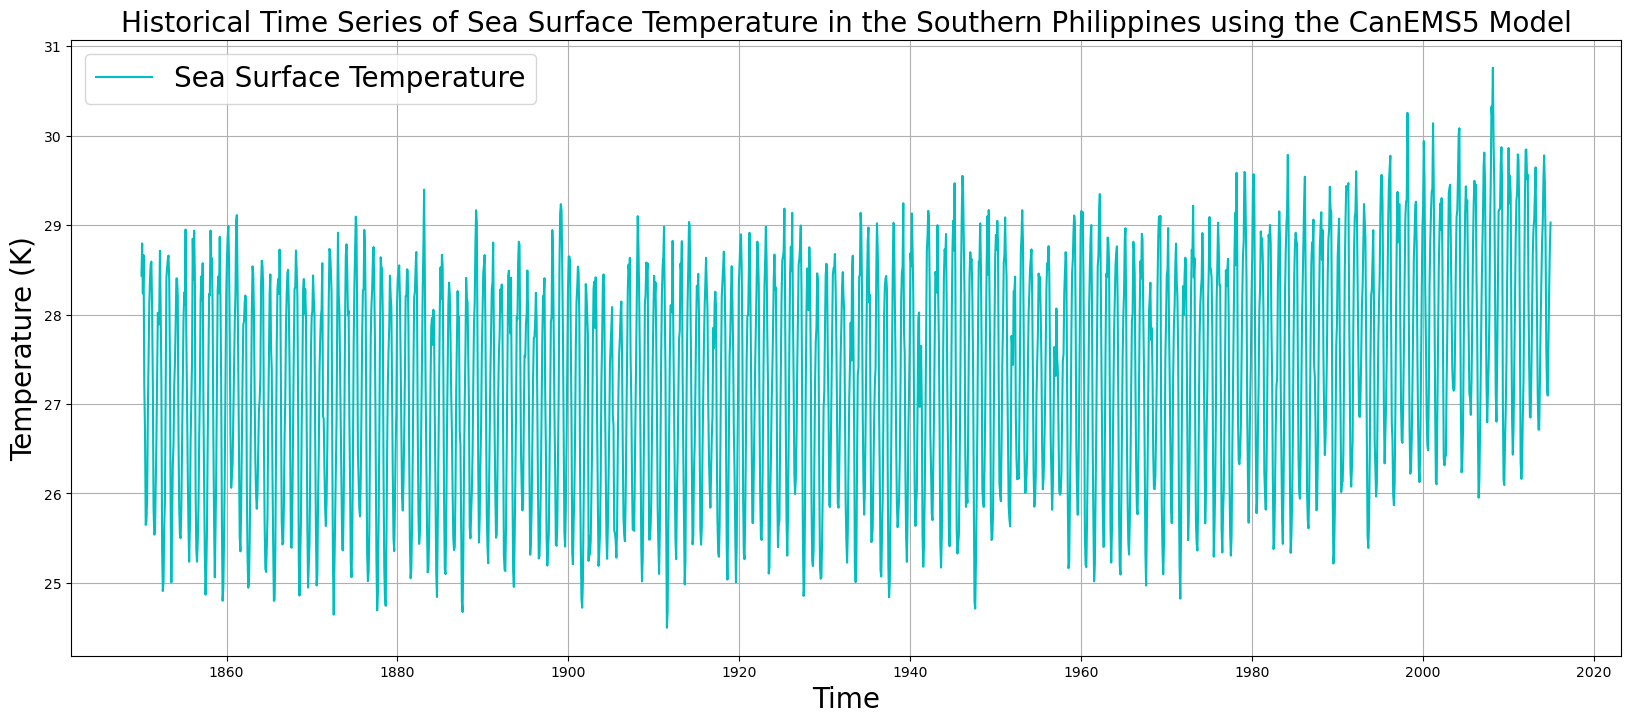

In [14]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
res1_lat = (historical_canesm5.i >= lat_min) & (historical_canesm5.i <= lat_max)
res1_lon = (historical_canesm5.j >= lon_min) & (historical_canesm5.j <= lon_max)

# Find points where the mask value is True, drop all other points
tos_res1 = historical_canesm5.where(res1_lat & res1_lon, drop=True)

# Average over lat, lon dimensions to get a time series ... from looking at the output of tos_CI it looks like these are j and i
tos_res1 = tos_res1.mean(dim=["i", "j"])

# Plot 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time1, tos_res1.tos, label='Sea Surface Temperature', color='c')
ax.set_title("Historical Time Series of Sea Surface Temperature in the Southern Philippines using the CanEMS5 Model", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

# Plot 3

In [15]:
# Take a look at this xarray and its variables
ssp_585

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1032, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (time, j, i) float32 dask.array<chunksize=(214, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            66c9146b8290f2c6ba88fd7d4119ba01e952e060
    CCCma_parent_runid:          rc3.1-his08
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s8508
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/bf5f2359-2a00-4e9f-a842-2fabc82...
    variable_id:                 tos
    variant_label:               r8i1p1f1
    version:                     v20190429
    netcdf_tracking_ids:         hdl:21.14100/bf5f2359-2a00-4e9f-a842-2fabc82...
    version_id:                  v20190429

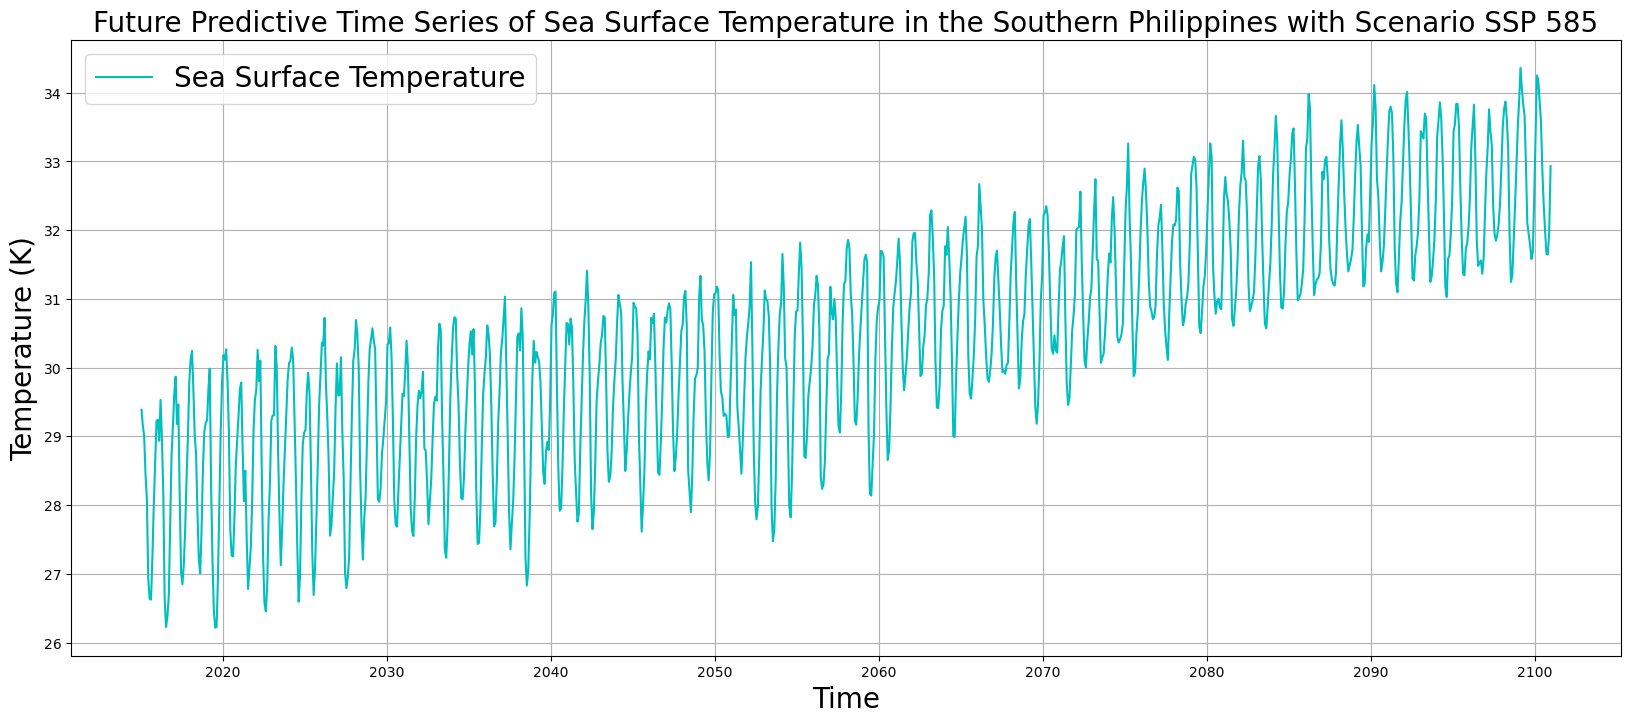

In [16]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
res2_lat = (ssp_585.i >= lat_min) & (ssp_585.i <= lat_max)
res2_lon = (ssp_585.j >= lon_min) & (ssp_585.j <= lon_max)

# Find points where the mask value is True, drop all other points
tos_res2 = ssp_585.where(res2_lat & res2_lon, drop=True)

# Average over lat, lon dimensions to get a time series ... from looking at the output of tos_CI it looks like these are j and i
tos_res2 = tos_res2.mean(dim=["i", "j"])

# Plot 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time2, tos_res2.tos, label='Sea Surface Temperature', color='c')
ax.set_title("Future Predictive Time Series of Sea Surface Temperature in the Southern Philippines with Scenario SSP 585", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

# Plot 4

In [18]:
# Take a look at this xarray and its variables
ssp_126

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1032, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (time, j, i) float32 dask.array<chunksize=(211, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float32 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float32 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            24718c8346665b218729640ffe79d263b76456c4
    CCCma_parent_runid:          rc3.1-his08
    CCCma_pycmor_hash:           be2c9bfff1e87cd5a67840089dfad9cf0e987be1
    CCCma_runid:                 rc3.1-s2608
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    variable_id:                 tos
    variant_label:               r8i1p1f1
    version:                     v20190306
    status:                      2019-11-15;created;by nhn2@columbia.edu
    netcdf_tracking_ids:         hdl:21.14100/37fdc637-d826-4078-9201-1d41784...
    version_id:                  v20190429

In [20]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
res3_lat = (ssp_126.i >= lat_min) & (ssp_126.i <= lat_max)
res3_lon = (ssp_126.j >= lon_min) & (ssp_126.j <= lon_max)

# Find points where the mask value is True, drop all other points
tos_res3 = ssp_126.where(res3_lat & res3_lon, drop=True)

# Average over lat, lon dimensions to get a time series ... from looking at the output of tos_CI it looks like these are j and i
tos_res3 = tos_res3.mean(dim=["i", "j"])

In [ ]:
# Plot 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time3, tos_res3.tos, label='Sea Surface Temperature', color='c')
ax.set_title("Future Predictive Time Series of Sea Surface Temperature in the Southern Philippines with Scenario SSP 126", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

5. Write 1-2 paragraphs in markdown text describing the results of your plot, and what you think they might mean for humans or ecosystems located in your study region.

It is clear from these historic plots, that sea surface temperature has been rising steadily, with most of the trend upwards occuring recently. The predictive plot shows this upwards trend increasing sharply into the future, especially in the 585 plot, which is one of the predictive scenarios with the highest levels of warming. 

The two different model types have some variation, espcecially on a year to year basis. However, the general trend remains largely the same between the two models.